Cho bộ điểm $(x_i, y_i)$, tìm hàm thực nghiệm có dạng
$$g(x) = ln(\alpha + a_1\phi_1(x) + a_2\phi_2(x) + ... + a_k\phi_k(x)) + b$$

e mũ hai vế để đưa về dạng tuyến tính 
$$h(x) = e^{g(x) - b} = \alpha + a_1\phi_1(x) + a_2\phi_2(x) + ... + a_k\phi_k(x)$$

1, $\phi_1, \phi_2,..., \phi_k$ là hàm cơ sở, $(\alpha, a_1, a_2,..., a_k)$ là bộ hệ số cần tìm, $(x_i, z(y_i) =  e^{y_i - b})$ là bộ điểm sử dụng để tìm hàm thực nghiệm.  

Đặt

\begin{align}
M = \begin{pmatrix}
1 & 1 & \ldots & 1\\
\phi_1(x_1) & \phi_1(x_2) & \ldots & \phi_1(x_n)\\
\phi_2(x_1) & \phi_2(x_2) & \ldots & \phi_2(x_n)\\
\vdots & \vdots & \ddots & \vdots\\
\phi_k(x_1) & \phi_k(x_2) & \ldots & \phi_k(x_n)
\end{pmatrix},\\
\end{align}

$$
Y = \begin{pmatrix}
z(y_1)\\
z(y_2)\\
\vdots\\
z(y_n)
\end{pmatrix}, z(y) = -y, z(y) = y+N \text{ hoặc là hàm hợp của cả 2 tùy vào bài toán}
$$

Bộ hệ số cần tìm là
$$
    A = \begin{pmatrix}
    \alpha\\
    a_1\\
    a_2\\
    \vdots\\
    a_k
    \end{pmatrix} = (MM^T)^{-1}MY
$$


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

# Input: File dữ liệu chứa x[i], y[i], Mỗi cặp (x[i], y[i]) nằm trên 1 dòng, không có 2 cặp nào nằm cùng 1 dòng
       # Các hàm cơ sở: Nhập trong hàm Phi
       # Hệ số b nếu đề bài cho trước
# Output: Bộ hệ số tương ứng với các hàm cơ sở

Nhập các hàm cơ sở ở đây, $\phi_0 $ thì nhập là 1 vì luôn có 1 hàm cơ sở là v(x) = 1

In [122]:
b = 0

max_par = 10 # Số lượng hàm cơ sở tối đa

def Phi(x): # Các hàm cơ sở, tối đa 10 hàm, nếu 10 hàm không đủ thì thay 10 bằng số khác rồi thêm hàm cơ sở vào :V
    phi = np.zeros(max_par)
    #Nhập hàm cơ sở ở đây 
    phi[0] = 1
    phi[1] = x
    phi[2] = x*x
    phi[3] = math.cos(x)*math.cos(x)
    
    return phi

Đọc dữ liệu từ file và vẽ đồ thị để dự đoán dạng hàm 

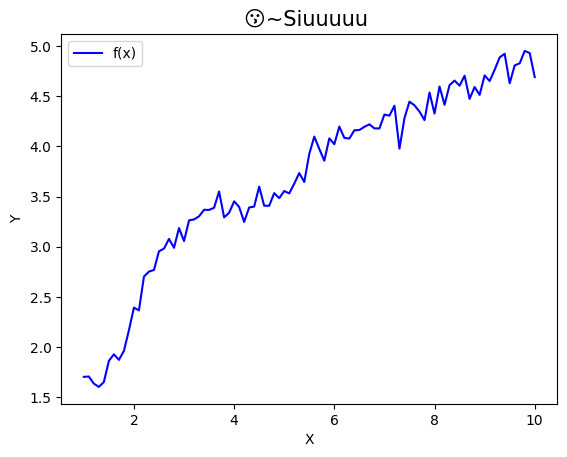

In [123]:
# Đọc dữ liệu từ file để xử lí :V 
x = []
y = []

sys.stdin = open('BPTTDangEMu_input.txt', 'r')
try:
    for xi_yi in sys.stdin:
        xi_yi = xi_yi.split()
        if len(xi_yi) != 2:
            continue
        x.append(float(xi_yi[0]))
        y.append(float(xi_yi[1]))
finally:
    if sys.stdin and not sys.stdin.closed:
        sys.stdin.close()

x = np.array(x)
y = np.array(y)
n = len(x)
flag_times = 1
flag_plus = 0

plt.plot(x, y, color = 'blue', label = 'f(x)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title("😗~Siuuuuu ", fontsize = 15)
plt.show()

Gói con xử lí mấy thứ râu ria và bình phương tối thiểu

In [124]:
def SoLuongThamSo(): # Nếu số lượng tham số trong đầu ra khác với số lượng hàm cơ sở thì thay 0.5 bằng số khác đến khi bằng nhau thi thôi :V
    ans = 0
    phi = Phi(0.5)
    for i in range(max_par):
        if phi[i] != 0:
            ans += 1
    return ans

k = SoLuongThamSo()
print("k = ", k)


def M_Column(x): #Tạo các cột của ma trận M :V
    ans = np.zeros(k)
    Phi_x = Phi(x)
    for i in range(k):
        ans[i] = Phi_x[i]
    return ans

def BinhPhuongNhoNhat(x, y):
    M = np.zeros((k, n))
    for i in range(n):
        M[:, i] = M_Column(x[i]) 
    M_Tranpose = np.transpose(M)
    print(np.linalg.det(np.dot(M, M_Tranpose)))
    return np.dot(np.dot(np.linalg.inv(np.dot(M, M_Tranpose)), M), y), M

k =  4


Xử lí dữ liệu ban đầu và đưa về dạng tuyến tính

In [125]:
def XuLiDuLieu(x, y):
    n = len(x)
    for i in range(n):
        y[i] = math.exp(y[i]-b) # Nếu b cho trước thì sửa y[i] thành y[i]-b, còn không thì mặc định b = 0
    print("$y = e^{y-b}$ = [", y[0], y[1],"...", y[-2], y[-1], "]^T")
    return y

y_copy = np.copy(y)
y_copy = XuLiDuLieu(x, y_copy)

$y = e^{y-b}$ = [ 5.489502479308466 5.50651682686669 ... 138.29975710840955 108.89382408644765 ]^T


Lôi data đã xử lí ra và chém bình phương tối thiểu

In [126]:
HeSoCanTim, M = BinhPhuongNhoNhat(x, y_copy) 

2169168740.9729834


Chém kết quả vào (Đừng quên bước xử lí dữ liệu)

In [127]:
print("Y = [y_1 y_2 ... y_n]^T")
print("phi_0 = 1 , phi_1 = , phi_2 = ...") # Vì có 1 hàm cơ sở v(x) = 1
print(" M = Công thức (1) = ")
rounded_M = np.round(M, decimals=4)
selected_columns = np.concatenate((rounded_M[:, :2], np.full((rounded_M.shape[0], 1), '...'), rounded_M[:, -2:]), axis=1)
selected_columns_str = np.array2string(selected_columns, separator='  ', formatter={'str_kind': lambda x: x})
print(selected_columns_str)

print("[alpha a_1 a_2 ...]^T = (MM^T)^{-1}MY = ", HeSoCanTim)



Y = [y_1 y_2 ... y_n]^T
phi_0 = 1 , phi_1 = , phi_2 = ...
 M = Công thức (1) = 
[[1.0  1.0  ...  1.0  1.0]
 [1.0  1.1  ...  9.9  10.0]
 [1.0  1.21  ...  98.01  100.0]
 [0.2919  0.2057  ...  0.7907  0.704]]
[alpha a_1 a_2 ...]^T = (MM^T)^{-1}MY =  [0.47537809 2.12501617 1.03326544 8.15178014]


Vẽ hình để so sánh hàm thực nghiệm và giá trị ban đầu

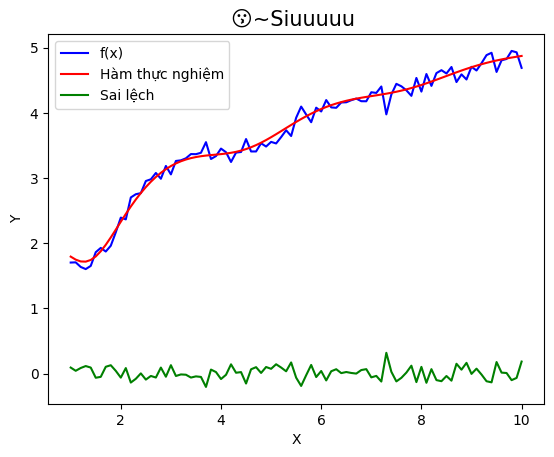

Trung bình phương sai số:  0.00936038631064534


In [128]:
y_predict = np.zeros(n)
error = 0
for i in range(n):
    HamCoSo = Phi(x[i])
    caismux = 0
    for j in range(k):
        caismux += HeSoCanTim[j] * HamCoSo[j]
    y_predict[i] = math.log(caismux) + b
    error += (y_predict[i] - y[i])*(y_predict[i] - y[i])

plt.plot(x, y, color = 'blue', label = 'f(x)')
plt.plot(x, y_predict, color = 'red', label = 'Hàm thực nghiệm')
plt.plot(x, y_predict-y, color = 'green', label = 'Sai lệch')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title("😗~Siuuuuu ", fontsize = 15)
plt.show()
print("Trung bình phương sai số: ", error/n)